<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/LabSolutions/Solutions03_EDA_Quantitative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="03intro">1.3: Exploring Quantitative Data</a>

---


Additional Reading:

-   See [Overview of Plotting Data in R](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Appendix/Overview-of-Plots.ipynb) for further reading and examples about plotting in R.
-   See [Fundamentals of Working with Data](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Appendix/Intro-to-Vectors-Dataframes.ipynb) for more information about data types and structures in R.
-   The [R Graph Gallery](https://r-graph-gallery.com/) has examples of many other types of graphs.


# <a name="03variables">Types of Variables</a>

---

In statistics,  <font color="dodgerblue">**variables** </font> are the attributes measured or collected in data. We refer to them as variables since the values or classes of attributes typically vary from observation to observation. The term variable is used differently in statistics from the notion of a variable in algebra. There are two types of variables in statistics:

-   If a variable is measured or counted by a number, it is called a <font color="dodgerblue">**quantitative** </font> or <font color="dodgerblue">**numerical** </font> variable.
  -   Quantitative variables may be <font color="dodgerblue">**discrete (integers)**</font> or <font color="dodgerblue">**continuous (decimals)**</font>.

-   If a variable groups observations into different categories or rankings, it is a <font color="dodgerblue">**qualitative** </font> or <font color="dodgerblue">**categorical** </font> variable.
  -   The different categories of a qualitative variable are called <font color="dodgerblue">**levels** </font> or <font color="dodgerblue">**classes** </font>.

The type of statistical analysis we can do depends on whether:

-   We are investigating a single variable, or looking for an association between multiple variables.
-   The variable(s) are quantitative or categorical.
-   The data satisfies certain assumptions.

In our work with [Exploring Categorical
Data](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap1/02-EDA-Categorical.ipynb), we performed an initial summary of the categorical variables in the `storms` data set. Today, we will investigate how to numerically and visually summarize quantitative variables.



# <a name="03data">Getting to Know Our Data</a>

---

The `dplyr` package contains a data set from the [NOAA Hurricane Best
Track Data](https://www.nhc.noaa.gov/data/#hurdat) that contains data on
the following attributes of tracked North Atlantic storms since 1975:

-   Storm name: `name`
-   Date and time: `year`, `month`, `day`, and `hour`
-   Storm position: `lat` and `long`
-   Storm classification: `status`
-   Category of hurricane: `category` (non-hurricanes are `NA`)
-   Wind speed (in knots): `wind`
-   Pressure (in millibars): `pressure`
-   Tropical storm force diameter (in nautical miles): `tropicalstorm_force_diameter`
-   Hurricane force diameter (in nautical miles): `hurricane_force_diameter`

See [Exploring Categorical Data](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap1/02-EDA-Categorical.ipynb) for a refresher on our initial exploration with the `storms` data frame.



## <a name="03load">Loading Required Package</a>

---

In order to access the `storms` data frame in the `dplyr` package, we first load the package with the `library()` function.

In [1]:
library(dplyr)  # load dplyr package


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## <a name="03help">Help Documentation for `storms`</a>

---

The `?` help operator and `help()` function provide access to the help manuals for R functions, data sets, and other objects. If at any point we want to learn more about data or a function used in this notebook, we can use the help operator. For example, `?typeof`, `?str`, `?hist`, and `?boxplot` will open a help tab with further details about each of function.

-   **Run the code cell below to access the help documentation for the `storms` data set.**

In [2]:
?storms  # open help tab

## <a name="03q1">Question 1</a>

---

List all the quantitative variables in `storms`. Which are being stored
as `integer`, and which are stored as `double` (decimals)?

- You can edit, run  and rerun the `typeof()` function in the first code cell below to help identify the data types of individual variables in `storms`.
- You can use the `str()` function in the second code cell to identify the data types of all variables at once.

In [3]:
typeof(storms$year)

[1] "double"

In [4]:
str(storms)

tibble [19,537 × 13] (S3: tbl_df/tbl/data.frame)
 $ name                        : chr [1:19537] "Amy" "Amy" "Amy" "Amy" ...
 $ year                        : num [1:19537] 1975 1975 1975 1975 1975 ...
 $ month                       : num [1:19537] 6 6 6 6 6 6 6 6 6 6 ...
 $ day                         : int [1:19537] 27 27 27 27 28 28 28 28 29 29 ...
 $ hour                        : num [1:19537] 0 6 12 18 0 6 12 18 0 6 ...
 $ lat                         : num [1:19537] 27.5 28.5 29.5 30.5 31.5 32.4 33.3 34 34.4 34 ...
 $ long                        : num [1:19537] -79 -79 -79 -79 -78.8 -78.7 -78 -77 -75.8 -74.8 ...
 $ status                      : Factor w/ 9 levels "disturbance",..: 7 7 7 7 7 7 7 7 8 8 ...
 $ category                    : num [1:19537] NA NA NA NA NA NA NA NA NA NA ...
 $ wind                        : int [1:19537] 25 25 25 25 25 25 25 30 35 40 ...
 $ pressure                    : int [1:19537] 1013 1013 1013 1013 1012 1012 1011 1006 1004 1002 ...
 $ tropicalstorm_for

### <a name="03sol1">Solution to Question 1</a>

---

<br>

The `storms` dataset is the NOAA Atlantic hurricane database best track data, <https://www.nhc.noaa.gov/data/#hurdat>. The data includes the positions and attributes of storms from 1975-2022. Storms from 1979 onward are measured every six hours during the lifetime of the storm.

<br>

The following variables are quantitative:

-  `year`, `month`, `day` and `hour` tells us when the storm observation was recorded.
  - `year`, `month`, and `hour` are **decimals**.
  - `hour` is with respect to UTC time.
  - `day` is stored as an **integer**.
- `lat` and `long` give the latitude and longitude of the location of the storm center. Both are stored as **decimals**.
- `category` is the Saffir-Simpson hurricane category calculated from wind speed.
  - Any storm which is not a hurricane has `category` value `NA`.
  - `category` is stored as a **decimal**.
- `wind` is the storm's maximum sustained wind speed (in knots) and is stored as an **integer**.
- `pressure` is the air pressure at the storm's center (in millibars) and is stored as an **integer**.
- `tropicalstorm_force_diameter` is the diameter (in nautical miles) of the area experiencing tropical storm strength winds (34 knots or above).
  - This variable is being stored as an **integer**.
  - This was only available starting in 2004, so there are many `NA` values for storm observations prior to 2004.
- `hurricane_force_diameter` is the diameter (in nautical miles) of the area experiencing hurricane strength winds (64 knots or above).
  - This variable is being stored as an **integer**.
  - This was also only available starting in 2004; thus, there are many `NA` for this variable.

<br> <br>
  



## <a name="03q2">Question 2</a>

---

What wind speeds are classified as a Category 2 hurricane?

### <a name="03sol2">Solution to Question 2</a>

---

<br>

Any storm with wind speed greater than 83 knots but less than 96 knots is a category 2 hurricane.

<br>
  



## <a name="03q3">Question 3</a>

---

What does the variable `tropicalstorm_force_diameter` measure? What does it mean if a storm observation has a 0 for `tropicalstorm_force_diameter`?

### <a name="03sol3">Solution to Question 3</a>

---

<br>

- `tropicalstorm_force_diameter` is the diameter (in nautical miles) of the area experiencing tropical storm strength winds (34 knots or above).
  - This was only available starting in 2004, so there are many `NA` values for storm observations prior to 2004.
  - If the storm is not a tropical storm, the diameter is 0.
- `hurricane_force_diameter` is the diameter (in nautical miles) of the area experiencing hurricane strength winds (64 knots or above).
  - This was also only available starting in 2004; thus, there are many `NA` for this variable.
  - If the storm is not a hurricane, the diameter is 0.


 <br> <br>
  



## <a name="03q4">Question 4</a>

---

Enter comments in the code cell below to help describe what each command performs. Then run the `str()` function after running the commands to see the updated data structure of `storms`.

### <a name="03sol4">Solution to Question 4</a>

---

In [5]:
# enter your comments after each #
storms$year <- as.integer(storms$year)  # convert year to an integer
storms$month <- as.integer(storms$month)  # convert month to an integer
storms$hour <- as.integer(storms$hour)  # convert hour to an integer
storms$category <- factor(storms$category)  # convert category to a categorical variable

In [6]:
# view the resulting data structure
str(storms)

tibble [19,537 × 13] (S3: tbl_df/tbl/data.frame)
 $ name                        : chr [1:19537] "Amy" "Amy" "Amy" "Amy" ...
 $ year                        : int [1:19537] 1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...
 $ month                       : int [1:19537] 6 6 6 6 6 6 6 6 6 6 ...
 $ day                         : int [1:19537] 27 27 27 27 28 28 28 28 29 29 ...
 $ hour                        : int [1:19537] 0 6 12 18 0 6 12 18 0 6 ...
 $ lat                         : num [1:19537] 27.5 28.5 29.5 30.5 31.5 32.4 33.3 34 34.4 34 ...
 $ long                        : num [1:19537] -79 -79 -79 -79 -78.8 -78.7 -78 -77 -75.8 -74.8 ...
 $ status                      : Factor w/ 9 levels "disturbance",..: 7 7 7 7 7 7 7 7 8 8 ...
 $ category                    : Factor w/ 5 levels "1","2","3","4",..: NA NA NA NA NA NA NA NA NA NA ...
 $ wind                        : int [1:19537] 25 25 25 25 25 25 25 30 35 40 ...
 $ pressure                    : int [1:19537] 1013 1013 1013 1013 1012

# <a name="03summary">Summarizing Categorical Data</a>

---

When we analyze the categorical variables in `storms`, we use counts and proportions. In the table created by the code cell below, we see how
many observations there are in each storm classification.

In [7]:
tbl.status <- table(storms$status) # store counts for each storm classification
tbl.status  # print table to screen


           disturbance          extratropical              hurricane 
                   171                   2151                   4803 
             other low subtropical depression      subtropical storm 
                  1453                    151                    298 
   tropical depression         tropical storm          tropical wave 
                  3569                   6830                    111 

The code cell below gives the proportion of storms in the data are in each storm classification.

In [8]:
# table of counts for each storm classification
prop.table(tbl.status)


           disturbance          extratropical              hurricane 
           0.008752623            0.110098787            0.245841224 
             other low subtropical depression      subtropical storm 
           0.074371705            0.007728925            0.015253109 
   tropical depression         tropical storm          tropical wave 
           0.182679019            0.349593080            0.005681527 

We used bar charts and pie charts to visualize the distribution and relations between categorical variables.

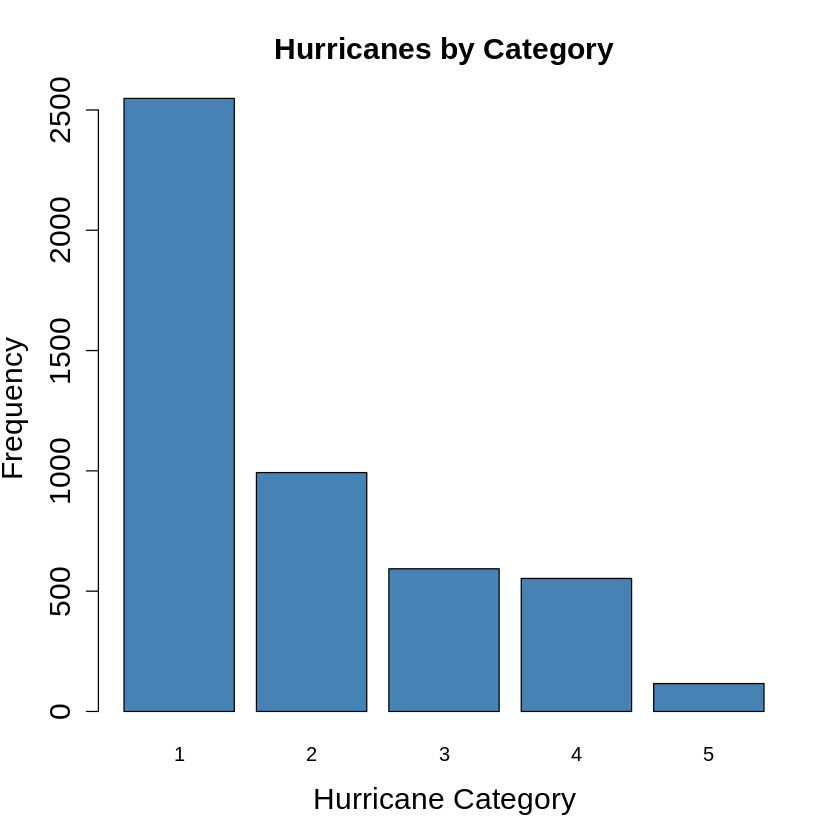

In [9]:
plot(storms$category,  # categorical data
     main = "Hurricanes by Category",  # main title
     xlab = "Hurricane Category",  # horizontal axis label
     ylab = "Frequency",  # vertical axis label
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
     col = "steelblue")  # fill color of bars)

-   <font color="tomato">**For quantitative variables, such as wind speed (`wind`), counting and proportions are not as appropriate or useful.**</font>
-   <font color="dodgerblue">**We get a better understanding of a quantitative variable by describing where the values are centered and the spread of the values.**</font>
-   Similarly, a good visualization for a quantitative variable will help illustrate where the values are centered, how variable (spread out) the values are, and other useful properties.



# <a name="03plot">Plotting Quantitative Data</a>

---

Additional resources for help with plotting data:

-   See [Overview of Plotting Data in R](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Appendix/Overview-of-Plots.ipynb) for further reading and examples about plotting in R.
-   The [R Graph Gallery](https://r-graph-gallery.com/) has examples of many other types of graphs.



## <a name="03hist">Histograms</a>

---

A  <font color="dodgerblue">**histogram** </font> is special bar chart we use to display the distribution of values for a quantitative variable.

-   We first group the values into different ranges of values called <font color="dodgerblue">**bins** </font> of equal width.
    -   This essentially converts the quantitative variable to an ordinal categorical variable with with each bin representing a different level.
    -   Consider the quantitative variable `wind`. We can use bin ranges such as 0-10 knots, 10-20 knots, … , 160-170 knots.
      -   Each bin range should have the same width.
      -   The bins do not overlap.
      -   The ordering of the bins is very important.
-   Then we count how many values in the data are in each bin.
-   A histogram is a bar chart that represents the number of values that are in each bin range.
-   Values of the quantitative variable are measured on the horizontal axis.
-   The height of the bars over each bin range is the number of values (or frequency) in each bin range.
-   **By default, the counts are right closed.** For example, a wind value of 20 knots would be counted in the bin range 10-20 knots and not counted in the bin range 20-30 knots.
-   A histogram should not have an spaces between consecutive bars. Empty space means no values are in that bin range.
-    <font color="dodgerblue">**The R function `hist(x, [options])` creates a histogram.** </font>
-   Run `?hist` for more information about the available options for customizing a histogram, some of which are illustrated in the code cell below.

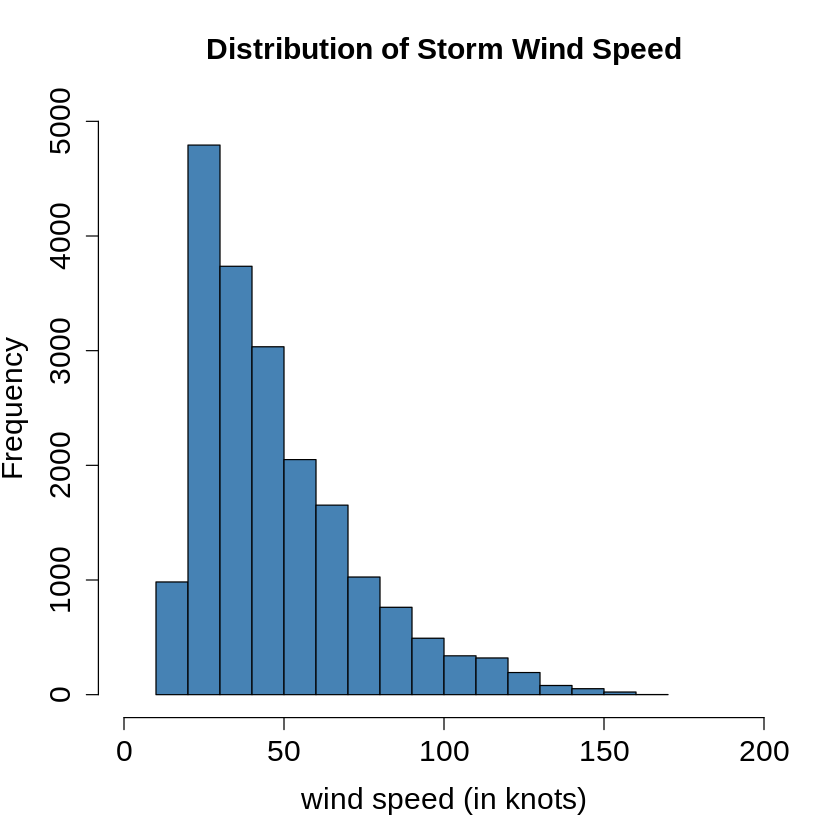

In [10]:
# create a histogram
hist(storms$wind,  # vector of values to plot
     breaks = 15,  # number of bin ranges to use
     xlab = "wind speed (in knots)",   # x-axis label
     xlim = c(0,200),  # sets window for x-axis
     ylab = "Frequency",  # y-axis label
     ylim = c(0,5000),  # sets window for y-axis
     main = "Distribution of Storm Wind Speed",  # main label
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
     col = "steelblue")  # fill color of bars

In [11]:
1000 + 4800 + 3600

[1] 9400

## <a name="03q5">Question 5</a>

---

Based on the histogram above, approximately how many storms have a wind
speed less than or equal to 40 knots?

### <a name="03sol5">Solution to Question 5</a>

---

<br>

Approximately $1000 + 4800 + 3600 = 9400$ storms have wind speed less than or equal to 40 knots.

<br>

  
  



## <a name="03q5">Question 6</a>

---

The code cell below can help us check our answer.

1.  Explain what operation(s) the command in the code cell below.
    Running the code cell and compare the last 10 entries in the vector
    `le.40` and the vector `storms$wind` to help determine your answer.

2.  Then run and explain what the second code cell below does. *Hint: R
    reads the logical `TRUE` as the number 1 and `FALSE` as the number
    0.*

3.  How accurate was your previous answer in [Question 5](#03q5)?

### <a name="03sol6">Solution to Question 6</a>

---

1.  Enter comment in first code cell.

2.  Enter comment in second code cell.

3.  How accurate was your answer in [Question 5](#03q5)?  

<br>

The estimate in [Question 5](#03q5) was 9400 which is off by 112. Very close!

In [12]:
le.40 <- storms$wind <= 40  # test whether each value is <= 40

tail(storms$wind, 10)  # prints last 10 rows of wind speed vector
tail(le.40, 10)  # prints last 10 rows of logical vector le.40

[1] 65 65 65 55 40 40 35 30 25 25

[1] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [13]:
# enter comment to interpret this command
sum(le.40)  # Count how many storms have less than 40 knots

[1] 9512

### <a name="03number-bins">Changing the Number of Bins</a>

---

A histogram can illustrate the general shape of the distribution of
quantitative variable; however, the number of breaks we use can have a
substantial impact.

-   If we include too few bins, we do not get much detail, and we may
    even get a misleading picture.
-   If we include too many bins, the histogram may be difficult to read.
-   The fun of interacting with data in R is we can play around and
    adjust the number of breaks and other options until we are
    satisfied.

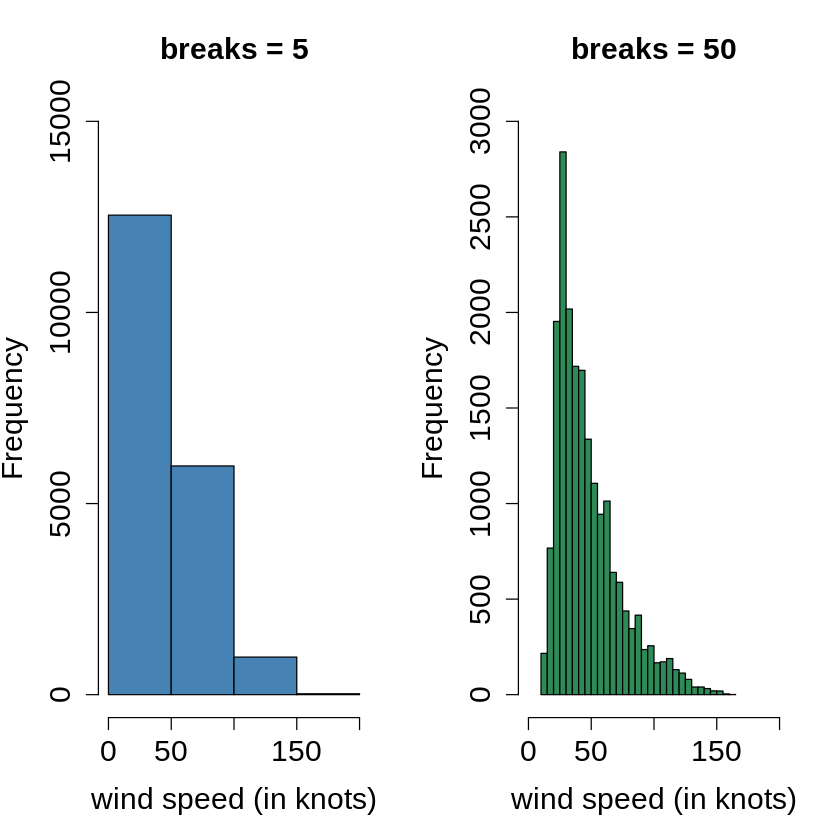

In [14]:
# plots appear in an array with 1 row and 2 columns
par(mfrow = c(1, 2))  # create an array of plots

# create a histogram
hist(storms$wind,  # vector of values to plot
     breaks = 5,  # number of bin ranges to use
     xlab = "wind speed (in knots)",   # x-axis label
     xlim = c(0,200),  # sets window for x-axis
     ylab = "Frequency",  # y-axis label
     ylim = c(0,15000),  # sets window for y-axis
     main = "breaks = 5",  # main label
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
     col = "steelblue")  # fill color of bars

# create a histogram
hist(storms$wind,  # vector of values to plot
     breaks = 50,  # number of bin ranges to use
     xlab = "wind speed (in knots)",   # x-axis label
     xlim = c(0,200),  # sets window for x-axis
     ylab = "Frequency",  # y-axis label
     ylim = c(0,3000),  # sets window for y-axis
     main = "breaks = 50",  # main label
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
     col = "seagreen")  # fill color of bars

## <a name="03q7">Question 7</a>

---

How would you describe the shape of the distribution of wind speed in the histograms above?

### <a name="03sol7">Solution to Question 7</a>

---

<br>

Most storm wind speeds are on the smaller end. There are some outliers of really strong storms that we can see from the tail to the right of the data.  The distribution is right skewed.

<br> <br>
  
  



## <a name="03q8">Question 8</a>

---

Create a histogram to display the quantitative variable `month`. What does the shape of that graph tell you about the data?

### <a name="03sol8">Solution to Question 8</a>

---

<br>

Most North Atlantic storms occur in the late summer/early fall (August, September, October). Storms at the start of year (in January-May) are infrequent, which gives a the plot a tail to the left.

<br>
  
  
  

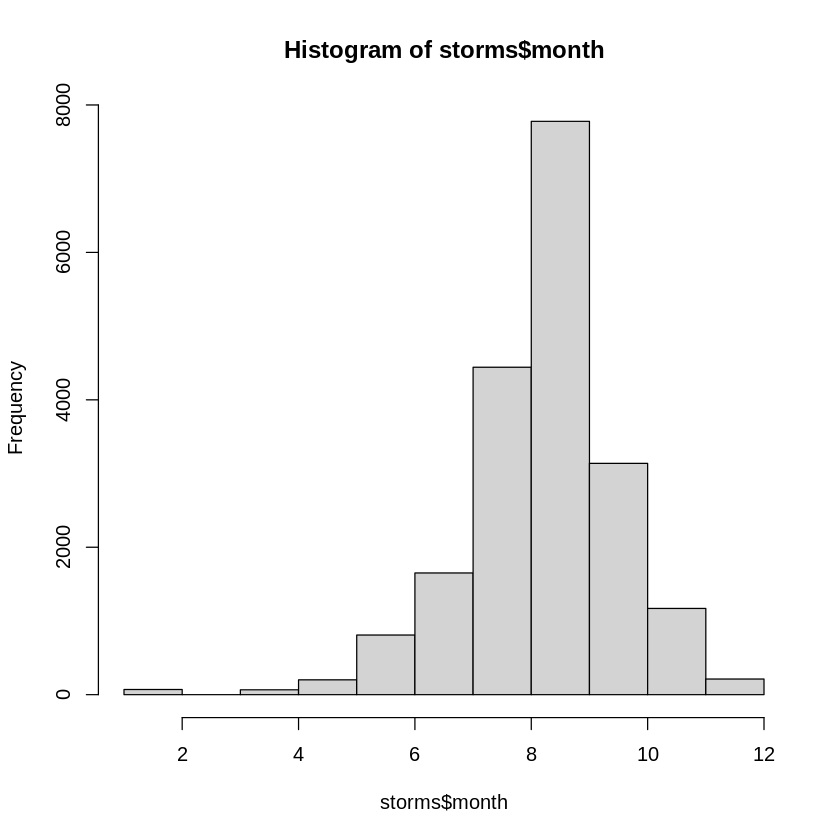

In [15]:
hist(storms$month, breaks = 13)

## <a name="03q9">Question 9</a>

---

Create a histogram to display the quantitative variable `long`. What does the shape of that graph tell you about the data?

### <a name="03sol9">Solution to Question 9</a>

---

<br>

The distribution is close to being symmetric, though there is a little tail to the right.


<br> <br>

  



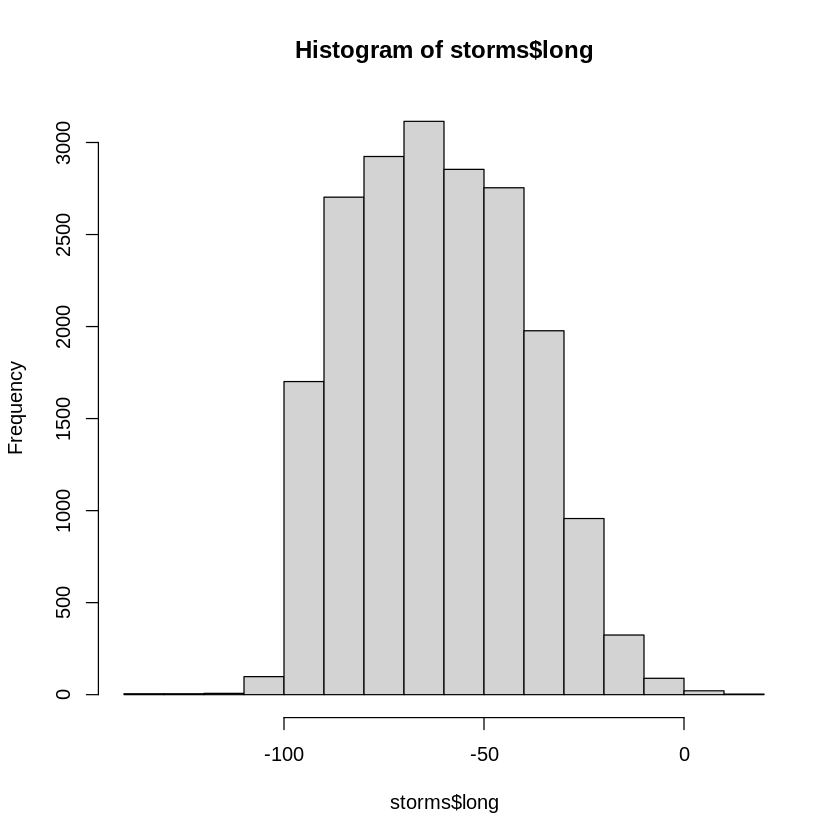

In [16]:
hist(storms$long, breaks = 13)

## <a name="03skewness">The Skewness of Data</a>

---

The  <font color="dodgerblue">**skewness** </font> of the data describes the direction of the tail of the data. The tail of the data indicates the direction of outliers (if any).

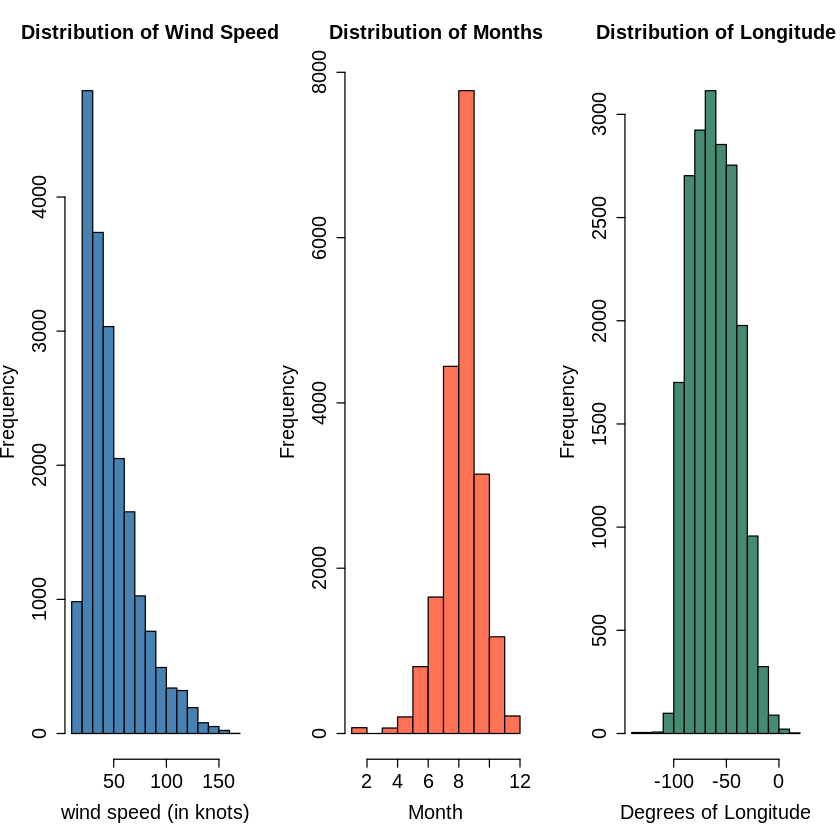

In [17]:
par(mfrow = c(1, 3))  # Create a 1 x 3 array of plots

hist(storms$wind,
     xlab = "wind speed (in knots)",   # x-axis label
     ylab = "Frequency",  # y-axis label
     main = "Distribution of Wind Speeds",  # main title
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
     col = "steelblue")  # fill color of bars

hist(storms$month,
     breaks = 12,  # number of breaks
     xlab="Month",   # x-axis label
     ylab = "Frequency",  # y-axis label
     main = "Distribution of Months",  # main title
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
     col = "coral1")  # fill color of bars

hist(storms$long,
     breaks = 15,  # number of breaks
     xlab="Degrees of Longitude",   # x-axis label
     ylab = "Frequency",  # y-axis label
     main = "Distribution of Longitude",  # main title
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
     col = "aquamarine4")  # fill color of bars

-   The distribution of wind speeds is
     <font color="dodgerblue">**skewed right** </font>.
-   The distribution of months is
     <font color="dodgerblue">**skewed left** </font>.
-   The distribution of longitude is approximately
     <font color="dodgerblue">**symmetric** </font>.



# <a name="03center">Measurements of Center</a>

---

Typical measurements of center are:

-   The  <font color="dodgerblue">**mean** </font> is the average
    value.

$${\large \bar{x} = \frac{\mbox{sum of all values}}{\mbox{total number of values}} =  \sum_{i=1}^{n} \frac{x_n}{n}}. $$

-   We use $\color{dodgerblue}{\mathbf{\bar{x}}}$ (pronounced x-bar) to
    denote a  <font color="dodgerblue">**sample** </font> mean.
    -   We use $\color{mediumseagreen}{\mathbf{\mu}}$ (Greek letter mu)
    to denote a
     <font color="mediumseagreen">**population** </font> mean.
    -   In R, we use the function `mean()`.
-   The  <font color="dodgerblue">**median** </font> is the
    $50^{\mbox{th}}$ percentile. This means 50% of the values in the
    data set are less than the median.
    -   In R, we use the function `median()`.
    - If there are an odd number of values, the median is the middle value.
    -   If there are an even number of values, the median is the
    midpoint between the two middle values.



## <a name="03q10">Question 10</a>

---

Compute the mean and median wind speed of the `storms` data. Interpret
each value in practical terms. Be sure to include the units in your
interpretation.

*Hint: We can input the vector of wind speeds with the code
`storms$wind`.*

### <a name="03sol10">Solution to Question 10</a>

---

- The average wind speed for the storm observations is $50.05$ knots.

- Half of the storms have a wind speed less than 45 knots. Half of the storms have a wind speed greater than 45 knots.

<br> <br> <br>

  
  



In [18]:
mean(storms$wind)
median(storms$wind)

[1] 50.04939

[1] 45

## <a name="03q11">Question 11</a>

---

Why do you think the mean wind speed is greater than the median wind
speed?

### <a name="03sol11">Solution to Question 11</a>

---

<br>

Since there are few very powerful storms that appear as outliers on the tail to the right, they pull the mean up while having no effect on the median value.

 <br> <br>
  
  



## <a name="03shape-center">Relation of Shape to Measurements of Center</a>

---

<figure>
<img
src="https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Statistical-Theory/main/Images/03fig-skewness.png"
alt="Image Credit: Adam Spiegler, CC BY-SA 4.0." />
<figcaption aria-hidden="true">Image Credit: Adam Spiegler, <a
href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA
4.0</a>.</figcaption>
</figure>

-   The mean is more sensitive to outliers than the median. The mean is
    pulled in the direction of the tail.
-   If the shape of the histogram is
     <font color="dodgerblue">**symmetric** </font>, then the
     <font color="dodgerblue">**mean is equal to the
    median** </font>.
-   If the shape of a histogram is  <font color="tomato">**skewed
    to the left** </font>, the  <font color="tomato">**mean is
    less than the median** </font>.
-   If the shape of a histogram is
     <font color="mediumseagreen">**skewed to the right** </font>,
    the  <font color="mediumseagreen">**mean is greater than the
    median** </font>.



# <a name="03spread">Measurements of Spread</a>

---


Typical measurements of spread are:

-   The  <font color="dodgerblue">**range = max - min** </font>.
    -   The advantage of the range is that it is easy to compute.
    -   However, the range ignores all values in the data other than the
    maximum and minimum values.
-   The  <font color="dodgerblue">**standard deviation** </font>
    approximately measures the average distance of all values from the
    mean value.
    -   For a sample,
$$\color{dodgerblue}{s = \sqrt{\dfrac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}}.$$

    -   The standard deviation takes all values into account and thus
    involves many calculations. We typically use technology to help!
    -   The command `sd(var_name)` computes the sample standard
    deviation in R.
    -   We use $\color{dodgerblue}{\mathbf{s}}$ to denote a
     <font color="dodgerblue">**sample** </font> standard
    deviation.
    -   We use $\color{tomato}{\mathbf{\sigma}}$ (Greek letter sigma) to
    denote a  <font color="tomato">**population** </font>
    standard deviation.

<figure>
<img
src="https://raw.githubusercontent.com/CU-Denver-MathStats-OER/Statistical-Theory/main/Images/03fig-stdev.png"
alt="Image Credit: Adam Spiegler, CC BY-SA 4.0." />
<figcaption aria-hidden="true">Image Credit: Adam Spiegler, <a
href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA
4.0</a>.</figcaption>
</figure>



## <a name="03q12">Question 12</a>

---

Which of the histograms (i)-(vi) has the largest range? The smallest
range?

### <a name="03sol12">Solution to Question 12</a>

---


- (iii), (iv), (v), and (vi) have the largest range (all equal to each other).

- (i) has the smallest range.

<br>
  
  



## <a name="03q13">Question 13</a>

---

Which of the histograms (i)-(vi) has the largest standard deviation? The
smallest standard deviation?

### <a name="03sol13">Solution to Question 13</a>

---

<br>

- (i) has the smallest standard deviation.

- (vi) has the largest standard deviation.

<br>
  



# <a name="03quartile">Quartiles</a>

---

-   The $25^{\mbox{th}}$ percentile is called the
     <font color="dodgerblue">**first quartile** </font> and is
    denoted $\color{dodgerblue}{\mathbf{Q_1}}$.
    - In R, use the function `quantile(x, probs=0.25)`.
-   The $75^{\mbox{th}}$ percentile is called the
     <font color="dodgerblue">**third quartile** </font> and is
    denoted $\color{dodgerblue}{\mathbf{Q_3}}$.
    - In R, use the function `quantile(x, probs = 0.75)`.
-   The  <font color="dodgerblue">**Interquartile Range
    (IQR)** </font>$\color{dodgerblue}{=Q_3-Q_1}$.
    - In R, use the function `IQR(x)`.
-   The  <font color="dodgerblue">**five number summary** </font>
    can also provide a good description of the spread of the values
    since we know <font color="dodgerblue">**25% of the values fall between each consecutive pair of values**</font>.
    $$\color{dodgerblue}{(\mbox{min}, Q_1 , \mbox{median}, Q_3, \mbox{max} )}$$
    -   In R, use the function `fivenum(x)` to compute the five number summary.



## <a name="03q14">Question 14</a>

---

Give the five number summary for the wind speed of all observations in the `storms` data set.

### <a name="03sol14">Solution to Question 14</a>

---

<br> <br> <br>
  


In [19]:
fivenum(storms$wind)

[1]  10  30  45  65 165

In [20]:
summary(storms$wind)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   30.00   45.00   50.05   65.00  165.00 

## <a name="03five-num">Five Number Summaries and Boxplots</a>

---

The five number summary for wind speeds is $(10, 30, 45, 65, 165)$.
Below is a  <font color="dodgerblue">**boxplot** </font> for this
data.

- 25% of the wind speeds are between 10 and 30 knots.
- 25% of the wind speeds are between 30 and 45 knots.
- 25% of the wind speeds are between 45 and 65 knots.
- 25% of the wind speeds are between 65 and 165 knots.


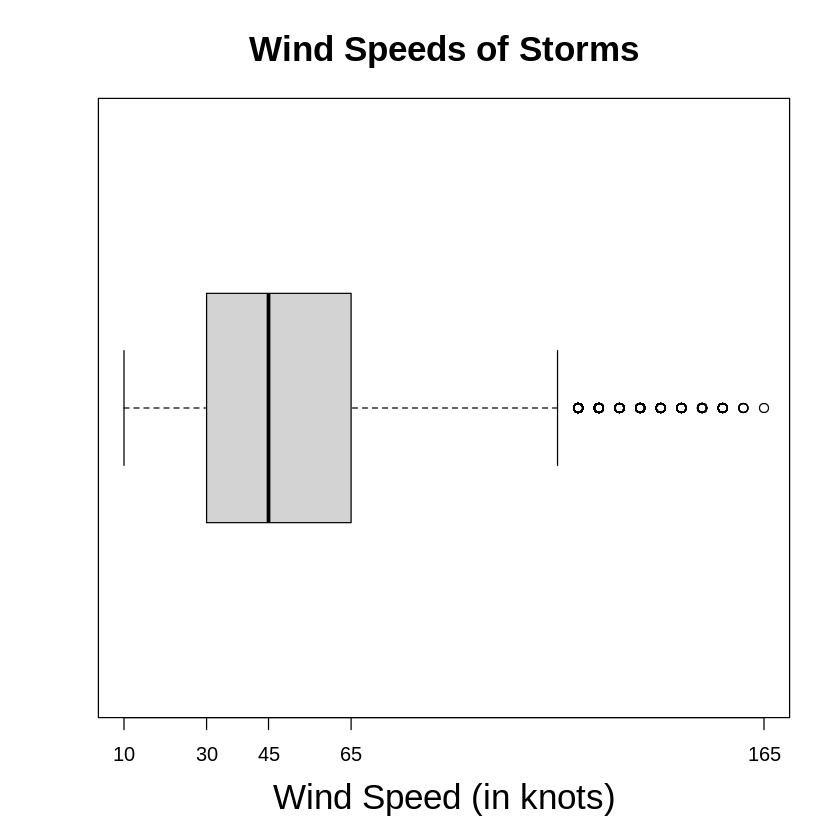

In [21]:
boxplot(storms$wind,  # data to plot
        main = "Wind Speeds of Storms",  # main title
        xlab = "Wind Speed (in knots)",  # x-axis label
        xaxt='n',  # turn off default ticks on x-axis
        cex.lab=1.75, cex.axis=1.75, cex.main=1.75,  # increase font size
        horizontal = TRUE)  # align horizontally
axis(1, at = fivenum(storms$wind))  # add tickmarks at five number summary

## <a name="03read-boxplot">How to Read and Create Boxplots</a>

---

To create a boxplot:

-   Find the values of $Q_1$, median, and $Q_3$.
-   Draw a box with edges at $Q_1$ and $Q_3$ and line inside the box for the median.
-   Identify the upper and lower fence to classify outliers:
    -   Upper fence $=Q_3 + 1.5(\mbox{IQR})$.
    -   Lower fence $=Q_1 - 1.5(\mbox{IQR})$.
-   Extend a line (whisker) from the lower edge of box to the smallest observation greater than the lower fence.
-   Extend a line (whisker) from the upper edge of the box to the largest
    value that is less than the upper fence.
-   The observations that are less than the lower fence or greater than
    the upper fence are considered
     <font color="dodgerblue">**outliers** </font>.
     -  Outlier values are marked with individual points.



## <a name="03q15">Question 15</a>

---

Compute the upper and lower fences for the wind speed observations in
`storms`.

### <a name="03sol15">Solution to Question 15</a>

---

<br> <br> <br>
  



In [22]:
iqr <- IQR(storms$wind)

lower.fence <- 30 - 1.5 * iqr
upper.fence <- 65 + 1.5 * iqr

lower.fence
upper.fence

[1] -22.5

[1] 117.5

# <a name="03ecdf">The Empirical Cumulative Distribution Function (ecdf)</a>

---

A question we often wish to explore is what proportion of values in our data are less or equal to a specified value $x$? To answer this question, we count the total number of observations in our data that are less than or equal to $x$, and then divide by the total number of observations in our data.



## <a name="03counting">Counting Observations with Logical Statements</a>

---

To illustrate how we can count observations that satisfy a given condition, consider the a vector of 5 values: $31$, $33$, $34$, $36$, and $38$. We store these values in the vector named `test.data` below. The command `test.data <= 35` applies a logical test to each of the 5 values in the vector:

> Is the value less than or equal to 35?

Run the code cell below and check the output to verify the test works as expected.

In [23]:
test.data <- c(31, 33, 34, 36, 38)  # vector of test data
test.data <= 35  # logical test

[1]  TRUE  TRUE  TRUE FALSE FALSE

-   The result `TRUE` is counted as 1.
-   The result `FALSE` is counted as 0.
-   We can use the `sum()` function to count how many `TRUE` results we have.
-   Running the code cell below, we verify that 3 values in `test.data` are less than or equal to 35.

In [24]:
sum(test.data <= 35)  # sum the TRUE results

[1] 3

In [25]:
sum(test.data <= 35) / length(test.data)

[1] 0.6

We can convert the count to a proportion by dividing by the total number of values in our data. Our vector `test.data` has a total of 5 observations; therefore, the proportion of values that are less than or equal to 35 is 3 out of 5 or $0.6$. We can use the `mean()` to count the number of `TRUE` results and divide by the total number of all observations in one command to simplify the code.

In [26]:
mean(test.data <= 35)  # total values <= 35 divided by total number of values

[1] 0.6

## <a name="03q16">Question 16</a>

---

What proportion of observations in `storms$wind` have a wind speed less
than or equal to 50 knots?

### <a name="03sol16">Solution to Question 16</a>

---

<br>

In [27]:
# what proportion of observations have wind less than or equal to 50
sum(storms$wind <= 50)

[1] 12546

In [28]:
n <- length(storms$wind)
sum(storms$wind <= 50) / n

[1] 0.6421661

In [29]:
mean(storms$wind <= 50)

[1] 0.6421661

## <a name="03formula-ecdf">What is the Empirical Cumulative Distribution Function?</a>

---

The  <font color="dodgerblue">**empirical cumulative distribution function (ecdf)** </font> is typically denoted by the notation $\mathbf{\color{dodgerblue}{\widehat{F}(x)}}$. We read the notation $\hat{F}$ as **F hat**, and we will make use of the hat notation throughout the semester.

-   The input $x$ is a value.
-   The output $\widehat{F}(x)$ of the ecdf is the proportion of values in the sample that are less than or equal to $x$.

Recall the vector `test.data` contains the values $31$, $33$, $34$, $36$, and $38$. We can express the ecdf as a piecewise function.

$$
\widehat{F}(x) = \left\{
\begin{array}{ll}
0  & x < 31 \\
0.2 &  31 \leq x < 33 \\
0.4 &  33 \leq x < 34 \\
0.6 &  34 \leq x < 36 \\
0.8 &  36 \leq x < 38 \\
1 & x \geq 38
\end{array} \right.
$$



## <a name="03graph-ecdf">Graphing the Empirical Cumulative Distribution Function</a>

---

We can plot the ecdf using the `plot.ecdf()` function in R, and the resulting plot is a piecewise, step function.

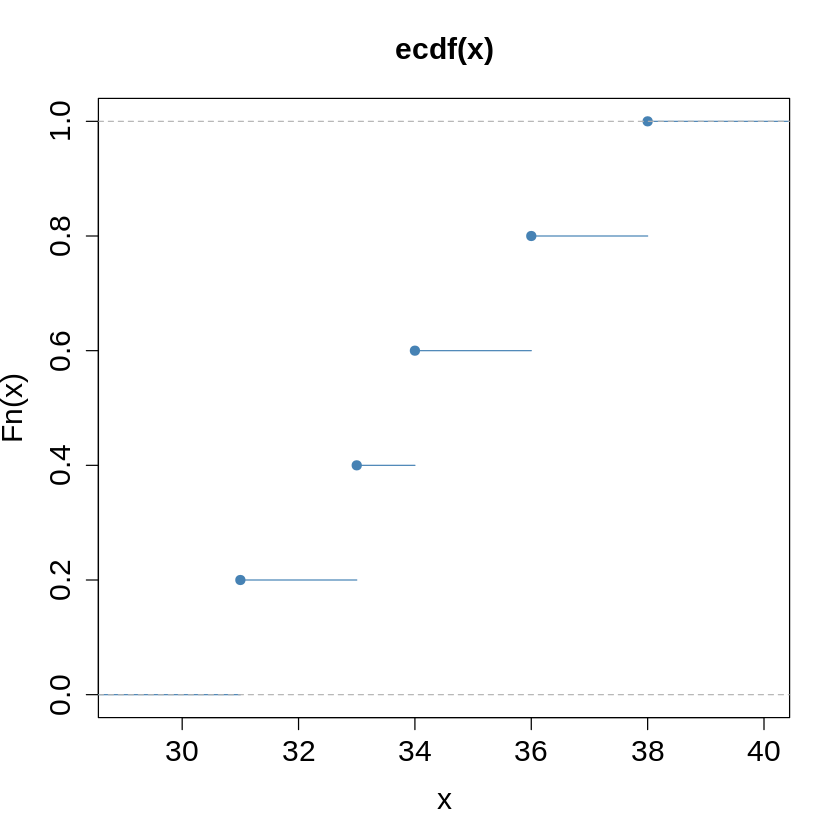

In [30]:
plot.ecdf(test.data, col="steelblue",
          cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size

## <a name="03q17">Question 17</a>

---

Complete the statements below to identify some key properties of ecdf’s.

### <a name="03sol17">Solution to Question 17</a>

---

-   The minimum output value of an ecdf is <mark>0</mark>.
-   The maximum value output value of an ecdf is <mark>1</mark>.
-   The ecdf is a <mark>non-decreasing</mark> function since as $x$ increases, $\widehat{F}(x)$ cannot decrease.

<br>

## <a name="03q18">Question 18</a>

---

Plot the empirical cumulative distribution function for the wind speeds
in the `storms` data set and check your answer to [Question 16](#03q16).

### <a name="03sol18">Solution to Question 18</a>

---

In the graph below, we see when $x=50$ knots the ecdf is between $0.6$ and $0.8$. This is consistent with our answer to [Question 16](#03q16).

<br>

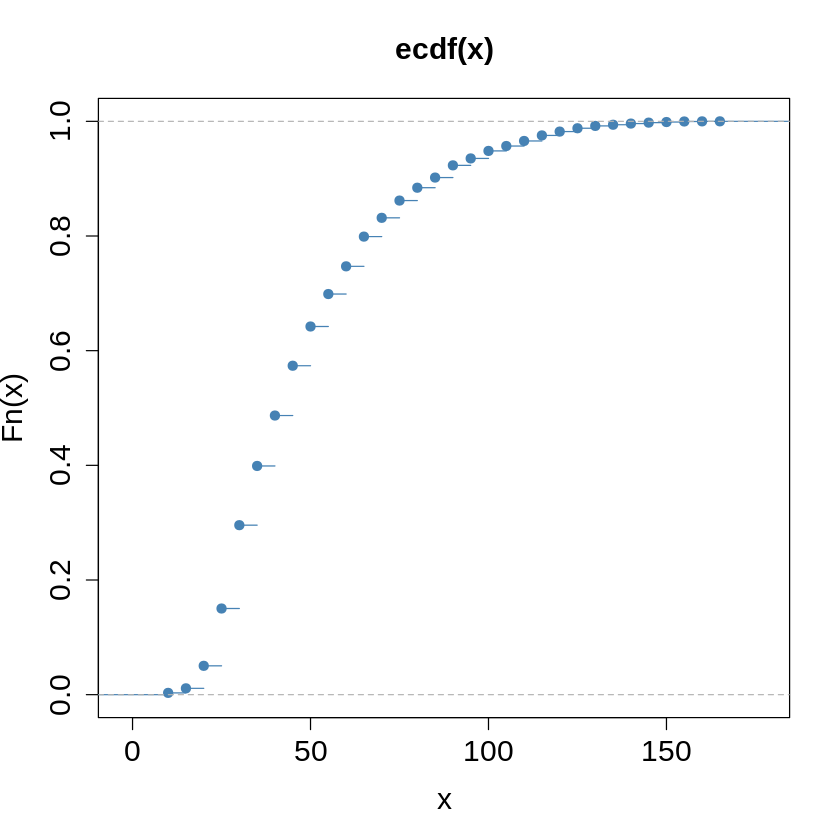

In [31]:
# plot the ecdf for wind speeds in storms
plot.ecdf(storms$wind, col="steelblue",
          cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size

# <a name="03compare">Comparing Quantitative and Categorical Data</a>

---

We have explored some of the categorical variables in the `storms` data set in our work with [Exploring Categorical Data](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap1/02-EDA-Categorical.ipynb). We have discussed how we can summarize and plot a quantitative variable. Often in statistics we would like to compare the distribution of a quantitative variable for different classes of a categorical variable. For example, we may be interested in investigating the following:

> In which month do storms have the greatest wind speed?

We first check the data type of the month variable in `storms` using the `typeof()` function.

In [32]:
typeof(storms$month)  # check how months is stored

[1] "integer"

## <a name="03factor-month">Converting a Quantitative Variable to a Categorical Variable with `factor()`</a>

---

Months were initially stored as decimals. We converted `month` to an integer earlier, and we can see `month` is still stored as an integer. Let’s convert `month` to a `factor` so R will treat each month as a separate class.

In [33]:
storms$month <- factor(storms$month)  # convert month to a categorical variable
summary(storms$month)  # check summary output after converting to factor

1    4    5    6    7    8    9   10   11   12 
  70   66  201  809 1651 4442 7778 3138 1170  212

## <a name="03side-by-side">Side by Side Boxplots with `plot()`</a>

---

The `plot()` function creates different types of plots depending on the data type and number of variables we enter.

-   If `x` is quantitative, `plot(x)` creates an index plot which is generally not too useful.
-   If `x` is categorical, `plot(x)` creates a bar chart.

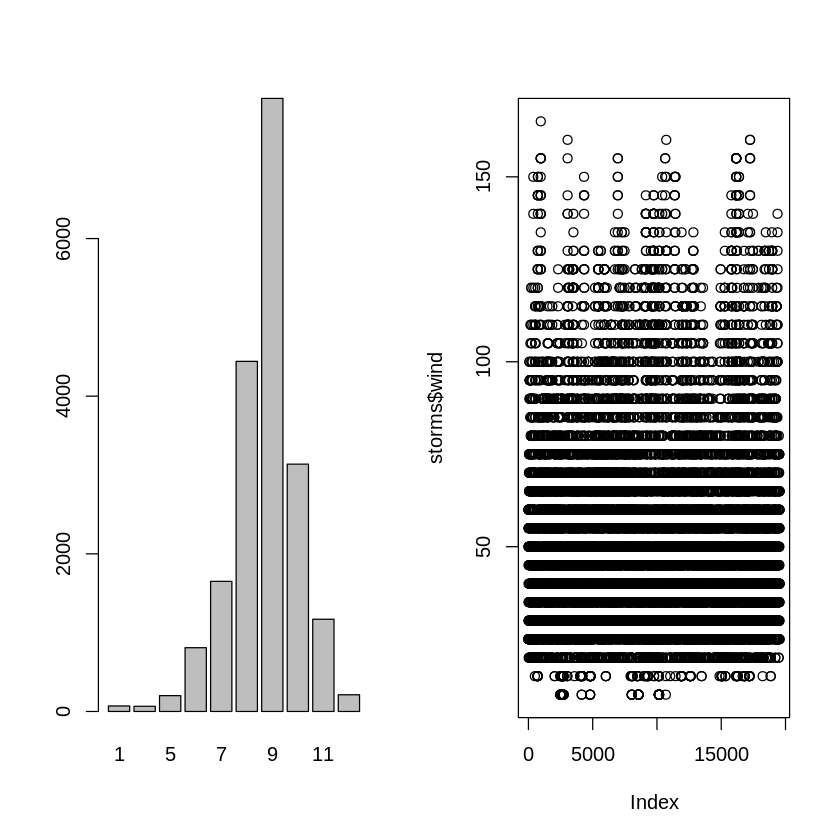

In [34]:
par(mfrow = c(1,2))  # create a 1 by 2 array of plots
plot(storms$month)  # bar chart is created for categorical data
plot(storms$wind)  # index plot is created for quantitative data

-   If `x` is categorical and `y` is quantitative,
    `plot(y ~ x, data = [name])` creates side by side boxplots, one for
    each class of `x`.
-   If both `x` and `y` are quantitative variables,
    `plot(y ~ x, data = [name])` creates a scatterplot.

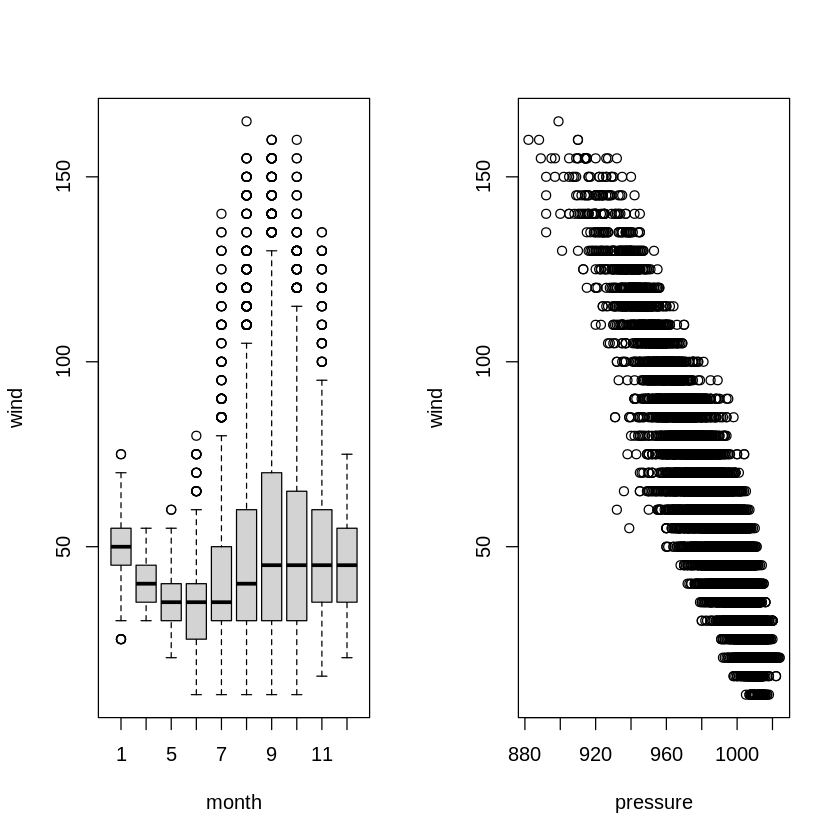

In [35]:
par(mfrow = c(1,2))  # create a 1 by 2 array of plots
plot(wind ~ month, data = storms)  # side by side boxplots
plot(wind ~ pressure, data = storms)  # scatterplot

The side by side boxplots created above are hard to read since we have
12 boxplots in total. The two months with the most storms data are
August and September.

> How can we compare storms only in August and September?

## <a name="03subset-filter">Subsetting and Filtering Data</a>

---

We can compare data for only August and September using various methods. One common method is to subset all of the data in `storms` into two separate data frames, one for each month. Below are three different ways we can subset data:

- Using the [`subset()`](#03subset) function in base R.
- Using the [`filter()`](#03filter) function in the `dplyr` package.
- Using [logical statements](#03logic).

Other methods exist as well.



### <a name="03subset">The `subset()` Function in Base R</a>

---

As the name implies, the `subset()` function in base R is a really useful function for subsetting! We can open the help documentation with `?subset` to learn how to apply this function. Below are some examples of different ways we may want to subset the `storms` data to analyze for storms that occurred in August.

In [36]:
# keeps all variables for storms in August
aug <- subset(storms, month == "8")

# keeps only the wind speed variable for August storms
aug.wind <- subset(storms, select = c(wind, month), month == "8")

# drop = T drops the column name and creates a vector instead of a data frame
aug.wind.vec <- subset(storms, select = wind, month == "8", drop = TRUE)

In [37]:
# we can see all variables are selected
head(aug)

name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
<chr>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<int>,<int>
Caroline,1975,8,24,12,22.4,-69.8,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,24,18,21.9,-71.1,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,25,0,21.6,-72.5,tropical depression,NA,25,1010,NA,NA
Caroline,1975,8,25,6,21.2,-73.8,tropical depression,NA,25,1010,NA,NA
Caroline,1975,8,25,12,20.9,-75.1,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,25,18,20.6,-76.4,tropical depression,NA,25,1011,NA,NA


In [38]:
# just the wind variable is selected
head(aug.wind)

wind,month
<int>,<fct>
25,8
25,8
25,8
25,8
25,8
25,8


In [39]:
# wind speeds in august stored in a vector
head(aug.wind.vec)

[1] 25 25 25 25 25 25

## <a name="03">Question 19</a>

---

Compute the mean and median wind speed of storms in August. Compare the values of the mean and median. What does this tell us about the shape of the data?

### <a name="03sol19">Solution to Question 19</a>

---

<br>

- The mean wind speed of the storms in August is $48.13$ knots.
- The median wind speed of August storms is $40$ knots.
- Since the mean is greater than the median, the data is skewed right. This means there are outliers on the right. In this context, this means there are a small number of very strong storms that occurred in August.

 <br> <br>
  



In [40]:
mean(aug$wind)
median(aug$wind)

[1] 48.13372

[1] 40

### <a name="03filter">The `filter()` Function in `dplyr`</a>

---

Using the `filter` function in `dplyr` package, we can filter out just
the August observations.

-   Note you need to load the `dplyr` package with a `library()` in
    order to use `filter()`.
-   We have already loaded `dplyr` since that is where the `storms` data
    is found.
-   The command below gives the same result as
    `subset(storms, month == "8")`.

In [41]:
aug2 <- filter(storms, month == "8")  # filter requires dplyr package
head(aug2)  # selects all variables

name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
<chr>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<int>,<int>
Caroline,1975,8,24,12,22.4,-69.8,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,24,18,21.9,-71.1,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,25,0,21.6,-72.5,tropical depression,NA,25,1010,NA,NA
Caroline,1975,8,25,6,21.2,-73.8,tropical depression,NA,25,1010,NA,NA
Caroline,1975,8,25,12,20.9,-75.1,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,25,18,20.6,-76.4,tropical depression,NA,25,1011,NA,NA


### <a name="03logic">Using Logical Statements</a>

---

When writing more complex code such as for loops, it is often useful to subset data using logical statements. For example, `storms[storms$month == "8", ]` extracts just the rows that have a `month` value equal to 8.

In [42]:
# extract rows from storms with month equal to 8
aug.logic <- storms[storms$month == "8", ]
head(aug.logic)

name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
<chr>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<int>,<int>
Caroline,1975,8,24,12,22.4,-69.8,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,24,18,21.9,-71.1,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,25,0,21.6,-72.5,tropical depression,NA,25,1010,NA,NA
Caroline,1975,8,25,6,21.2,-73.8,tropical depression,NA,25,1010,NA,NA
Caroline,1975,8,25,12,20.9,-75.1,tropical depression,NA,25,1011,NA,NA
Caroline,1975,8,25,18,20.6,-76.4,tropical depression,NA,25,1011,NA,NA


## <a name="03q20">Question 20</a>

---

Using one of the methods above, create a data frame name `sept` that
contains all variables for only the observations that occurred in
September.

### <a name="03sol20">Solution to Question 20</a>

---

<br>

In [43]:
# keeps all variables for storms in September
sept <- subset(storms, month == "9")
mean(sept$wind)
median(sept$wind)

[1] 54.58665

[1] 45

## <a name="03side-boxplot">Creating Side by Side Boxplots with `boxplot`</a>

---

Once we have created the data frames `aug` and `sept`, we can create side by side boxplots to compare the wind speeds for storms in these two months.

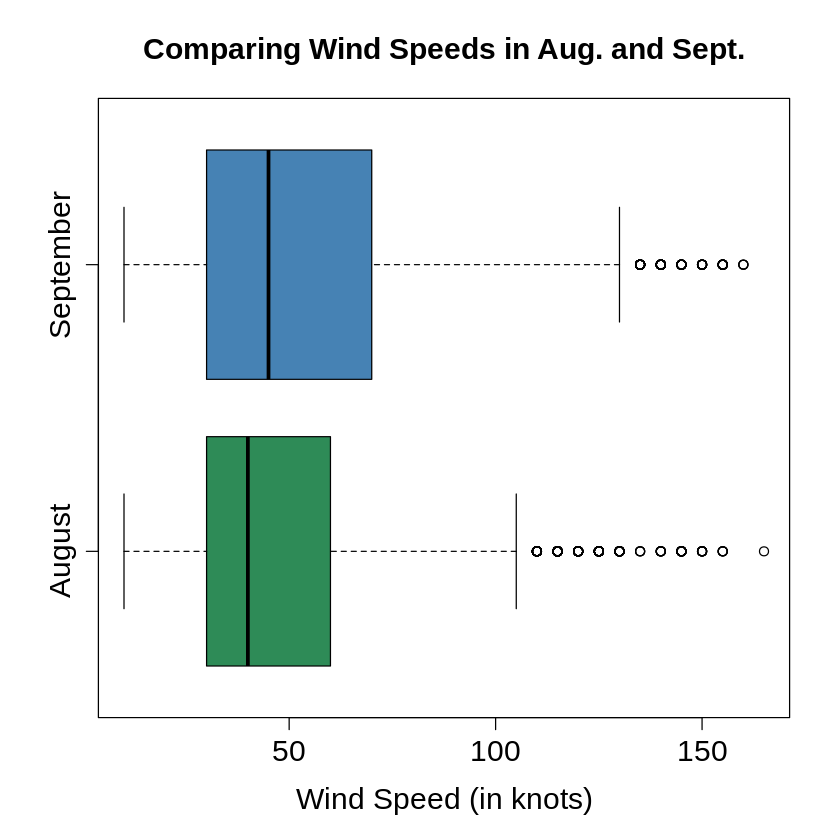

In [44]:
# need to answer previous question first
boxplot(aug$wind, sept$wind,  # enter two vectors of data
        main = "Comparing Wind Speeds in Aug. and Sept.",   # main title
        xlab = "Wind Speed (in knots)",  # x-axis label
        horizontal = TRUE,  # align boxplots horizontally
        names = c("August", "September"),  # label each boxplot
        cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
        col = c("seagreen", "steelblue"))  # fill color for box

## <a name="03q21">Question 21</a>

---

In which month (August or September) are the wind speeds of storms more
severe? What statistics did you use to draw your conclusion?

### <a name="03sol21">Solution to Question 21</a>

---

<br>

Overall, storms in September are slightly stronger than those in August. The median wind speed for September storms is a little bit larger than the August median.

The two medians are very close, and the distribution of wind speeds for storms less than 45 knots seems very similar. The distribution of wind speeds for storms over 45 knots however is different. For example, we see that:

In September, only 1/4 of the storms were greater than 75 knots. In August, the proportion of storms with wind speeds greater than 75 knots is less than 1/4.

 <br> <br>  
  



## <a name="03q22">Question 22</a>

---

Create side by side boxplots to compare the distribution of wind speeds
in July, August and September.

### <a name="03sol22">Solution to Question 22</a>

---

<br> <br> <br>  
  



In [45]:
# keeps all variables for storms in july
july <- subset(storms, month == "7")

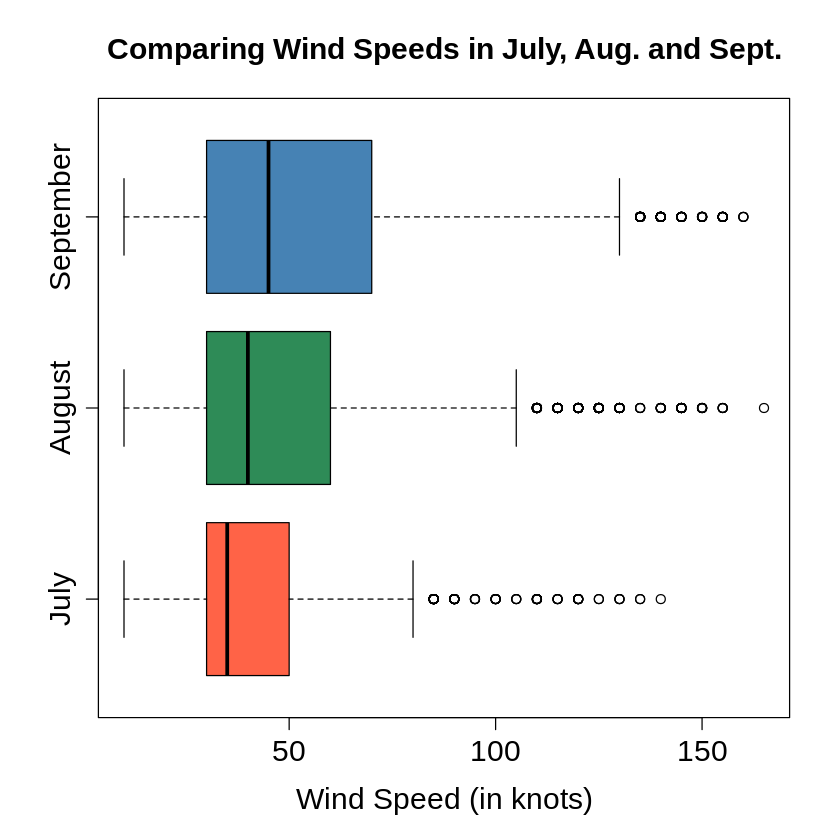

In [46]:
boxplot(july$wind, aug$wind, sept$wind,  # enter two vectors of data
        main = "Comparing Wind Speeds in July, Aug. and Sept.",   # main title
        xlab = "Wind Speed (in knots)",  # x-axis label
        horizontal = TRUE,  # align boxplots horizontally
        names = c("July", "August", "September"),  # label each boxplot
        cex.lab=1.5, cex.axis=1.5, cex.main=1.5,  # increase font size
        col = c("tomato", "seagreen", "steelblue"))  # fill color for box

# <a name="CC License">Creative Commons License Information</a>
---


![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory)
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado).

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.